In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import numpy as np
import copy
from PIL import Image

## Модель

In [3]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size = 3, padding = 1, padding_mode = 'replicate'),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    torch.nn.Conv2d(32, 64, kernel_size = 3, padding = 1, padding_mode = 'replicate'),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64, 128, kernel_size = 3, padding = 1, padding_mode = 'replicate'),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    torch.nn.Flatten(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(1152, 10)
    )

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
print(f"Model is on device: {next(model.parameters()).device}")

Model is on device: cuda:0


## 

In [6]:
# Замораживаем все слои
for param in model.parameters():
    param.requires_grad = False

## Сохранение модели

## Загрузка модели

In [9]:
# Загрузить модель
model.load_state_dict(torch.load('mnist_model.pth'))

<All keys matched successfully>

# Предсказание

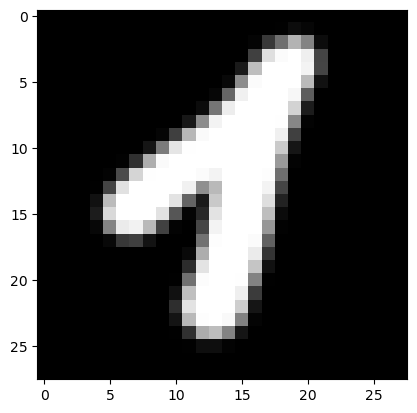

Предсказание. На избражении цифра 1
Выходы сети:
Цифра	Вес	Верояность
0	-21.59	0.0%
1	8.66	100.0%
2	-14.96	0.0%
3	-19.72	0.0%
4	2.18	0.0%
5	-7.74	0.0%
6	-21.46	0.0%
7	-7.74	0.0%
8	-17.16	0.0%
9	-5.64	0.0%


In [23]:
# Загрузка изображения и преобразование в тензор
img = Image.open("digits/1_600i.jpg")
# Преобразование в Grayscale
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),  # Конвертация в 1 канал
    transforms.ToTensor()
])
tensor_img = transform(img)  # Теперь размер [1, 28, 28]
# one = torch.ones_like(tensor_img)
# tensor_img = torch.where(tensor_img > 0.5, one, tensor_img)

# Предсказание
x_pred = tensor_img.unsqueeze(dim=1).clone().to(device)

# one = torch.ones_like(x_pred)
# print(one)
# x_pred = torch.where(x_pred > 0.1, one, x_pred)
# print(x_pred)
y_pred = model(x_pred)
y = torch.argmax(y_pred).item()

# вывести картинку и результат
plt.imshow(torch.squeeze(tensor_img), cmap='gray')  # squeeze убирает размерность канала
# plt.title(img.filename + ';\nПредсказание: ' + str(y))
plt.show()

print(f"Предсказание. На избражении цифра {str(y)}")
# Применяем softmax для получения вероятностей
probabilities = F.softmax(y_pred, dim=1)
# Преобразуем в проценты и округляем
percentages = torch.squeeze((probabilities * 100).round())
print("Выходы сети:")
print("Цифра\tВес\tВерояность")
for i in range(10):   
    print(f"{i}\t{torch.squeeze(y_pred)[i].item():.2f}\t{percentages[i].item()}%")
